In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

In [5]:
for f in os.listdir('./data'):
    print(f.ljust(30) + str(round(os.path.getsize('./data/' + f) / 1000000, 2)) + 'MB')

sample_submission_EZmX9uE.csv 0.0MB
test_BdBKkAj.csv              0.41MB
train_aWnotuB.csv             1.82MB
.gitignore                    0.0MB


In [6]:
def nl():
    print('\n')

In [92]:
df_train = pd.read_csv('./data/train_aWnotuB.csv', parse_dates=[0], infer_datetime_format=True)
df_test = pd.read_csv('./data/test_BdBKkAj.csv', parse_dates=[0], infer_datetime_format=True)

nl()
print('Size of training set: ' + str(df_train.shape))
print(' Size of testing set: ' + str(df_test.shape))

nl()
print('Columns in train: ' + str(df_train.columns.tolist()))
print(' Columns in test: ' + str(df_test.columns.tolist()))

nl()
print(df_train.describe())



Size of training set: (48120, 4)
 Size of testing set: (11808, 3)


Columns in train: ['DateTime', 'Junction', 'Vehicles', 'ID']
 Columns in test: ['DateTime', 'Junction', 'ID']


           Junction      Vehicles            ID
count  48120.000000  48120.000000  4.812000e+04
mean       2.180549     22.791334  2.016330e+10
std        0.966955     20.750063  5.944854e+06
min        1.000000      1.000000  2.015110e+10
25%        1.000000      9.000000  2.016042e+10
50%        2.000000     15.000000  2.016093e+10
75%        3.000000     29.000000  2.017023e+10
max        4.000000    180.000000  2.017063e+10


In [93]:
df_train.head()

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041


### Missing values

In [94]:
labels = []
values = []
for col in df_train.columns:
    labels.append(col)
    values.append(df_train[col].isnull().sum())
    print(col, values[-1])

DateTime 0
Junction 0
Vehicles 0
ID 0


### Distribution of junctions and vehicles

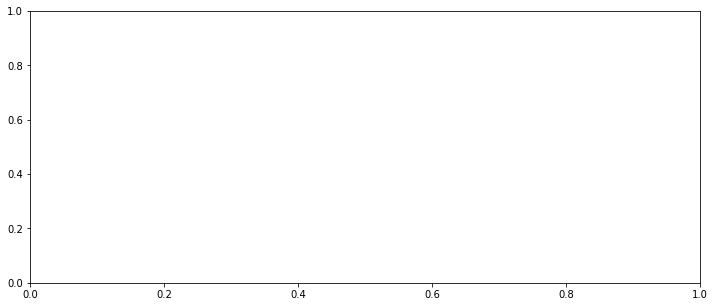

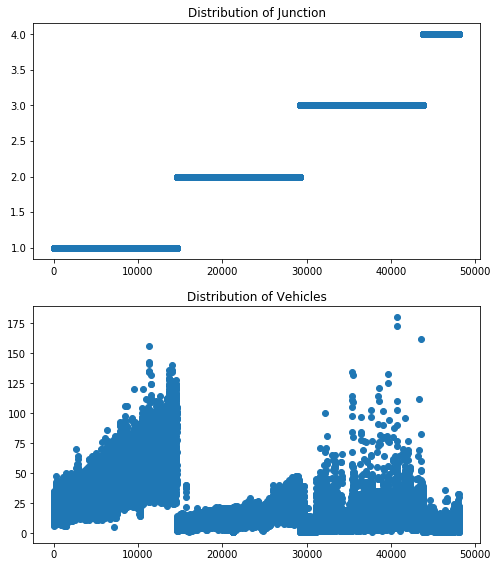

In [95]:
cols_to_use = ['Junction', 'Vehicles']
fig = plt.figure(figsize=(8, 20))
plot_count = 0
for col in cols_to_use:
    plot_count += 1
    plt.subplot(4, 1, plot_count)
    plt.scatter(range(df_train.shape[0]), df_train[col].values)
    plt.title("Distribution of "+col)
plt.show()

### Indexing

In [69]:
df_train[df_train.Junction==2].head()

,DateTime,Junction,Vehicles,ID
14592,2015-11-01 00:00:00,2,6,20151101002
14593,2015-11-01 01:00:00,2,6,20151101012
14594,2015-11-01 02:00:00,2,5,20151101022
14595,2015-11-01 03:00:00,2,6,20151101032
14596,2015-11-01 04:00:00,2,7,20151101042


In [70]:
df_train[df_train.Junction==3].head()

,DateTime,Junction,Vehicles,ID
29184,2015-11-01 00:00:00,3,9,20151101003
29185,2015-11-01 01:00:00,3,7,20151101013
29186,2015-11-01 02:00:00,3,5,20151101023
29187,2015-11-01 03:00:00,3,1,20151101033
29188,2015-11-01 04:00:00,3,2,20151101043


So our ID is DateTime concatenated with the Junction. We reindex with DateTime and junction to ease timeseries analysis


In [71]:
df_train = df_train.set_index(['Junction', 'DateTime'])

In [72]:
df_train.index.names

FrozenList(['Junction', 'DateTime'])

### Timestamp analysis

In [73]:
level_values = df_train.index.get_level_values

In [74]:
level_values(0)

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
           dtype='int64', name='Junction', length=48120)

In [75]:
level_values(1)

DatetimeIndex(['2015-11-01 00:00:00', '2015-11-01 01:00:00',
               '2015-11-01 02:00:00', '2015-11-01 03:00:00',
               '2015-11-01 04:00:00', '2015-11-01 05:00:00',
               '2015-11-01 06:00:00', '2015-11-01 07:00:00',
               '2015-11-01 08:00:00', '2015-11-01 09:00:00',
               ...
               '2017-06-30 14:00:00', '2017-06-30 15:00:00',
               '2017-06-30 16:00:00', '2017-06-30 17:00:00',
               '2017-06-30 18:00:00', '2017-06-30 19:00:00',
               '2017-06-30 20:00:00', '2017-06-30 21:00:00',
               '2017-06-30 22:00:00', '2017-06-30 23:00:00'],
              dtype='datetime64[ns]', name='DateTime', length=48120, freq=None)

In [82]:
time_targets = df_train.groupby([level_values(0)] + [pd.Grouper(freq='4H', level=-1)])['Vehicles'].sum()

In [83]:
time_targets

Junction  DateTime           
1         2015-11-01 00:00:00     45
          2015-11-01 04:00:00     32
          2015-11-01 08:00:00     55
          2015-11-01 12:00:00     59
          2015-11-01 16:00:00     65
          2015-11-01 20:00:00     71
          2015-11-02 00:00:00     52
          2015-11-02 04:00:00     50
          2015-11-02 08:00:00     97
          2015-11-02 12:00:00    125
          2015-11-02 16:00:00    104
          2015-11-02 20:00:00    118
          2015-11-03 00:00:00     71
          2015-11-03 04:00:00     47
          2015-11-03 08:00:00    109
          2015-11-03 12:00:00    114
          2015-11-03 16:00:00    108
          2015-11-03 20:00:00     95
          2015-11-04 00:00:00     62
          2015-11-04 04:00:00     46
          2015-11-04 08:00:00     88
          2015-11-04 12:00:00    104
          2015-11-04 16:00:00     98
          2015-11-04 20:00:00    100
          2015-11-05 00:00:00     70
          2015-11-05 04:00:00     46
        